In [7]:
from utils import conv
from utils import NN as nn
from utils import dataprepare as dp
from utils import Feature_extract as fe

import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [8]:
# import os
# # Load images and filenames
# train_images, train_image_filenames = dp.load_images_from_folder_filenames('rev_patching/patch_image')

# # Extract feature maps from images
# feature_maps = [fe.extract(image) for image in train_images]

# # Save feature maps with the same filenames as the original images
# for i, (feature_map, image_filename) in enumerate(zip(feature_maps, train_image_filenames)):
#     image_name = os.path.splitext(image_filename)[0]
#     pil_image = Image.fromarray(feature_map)
#     pil_image.save(f'rev_patching/feature_extract_image/{image_name}.png', format='PNG')

In [9]:
# Load images and ground truth labels
images_path = 'patching_fix/patch_image'
feature_images_path = 'patching_fix/extract_ori'
ground_truths_path = 'patching_fix/patch_ground'

images_load = dp.load_images_from_folder(images_path)
feature_images_load = dp.load_images_from_folder(feature_images_path)
ground_truths = dp.load_ground_truth_from_folder(ground_truths_path)

In [10]:
feature_images_train = feature_images_load[:math.ceil(len(feature_images_load)*0.7)] 
image_label_train = ground_truths[:math.ceil(len(ground_truths)*0.7)]

image_test = images_load[math.ceil(len(images_load)*0.7):]
image_label_test = ground_truths[math.ceil(len(ground_truths)*0.7):]

In [11]:
len(feature_images_train)

1769

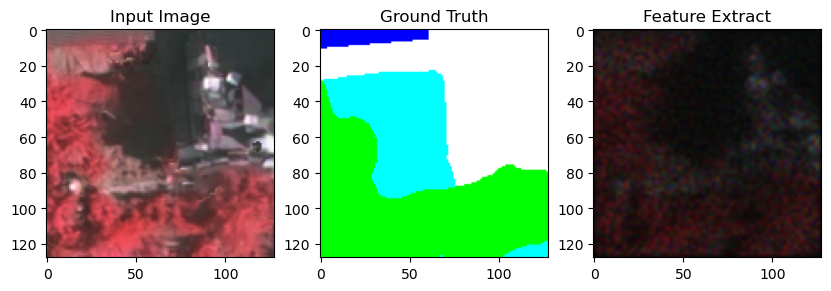

In [12]:
indeks = 1597
# Plot the images
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.imshow(images_load[indeks])
plt.title('Input Image')

plt.subplot(1, 3, 2)
plt.imshow(ground_truths[indeks])
plt.title('Ground Truth')

plt.subplot(1, 3, 3)
plt.imshow(feature_images_load[indeks])
plt.title('Feature Extract')

plt.show()

In [13]:
# Prepare data
X, y = dp.prepare_data(feature_images_train, image_label_train)

In [14]:
len(X)

3

In [15]:
# Normalize the features
X_normalized = X / 255.0

In [16]:
X_normalized.shape

(3, 28983296)

In [17]:
# Initialize the neural network
input_size = X_normalized.shape[0]
hidden_size = 2  # hidden neuron
output_size = 2  # 2 classes: vegetation and non-vegetation
learning_rate = 0.001
num_epochs = 20
toleransi_error = 0.1

# Initialize the neural network with adjusted hidden size
model = nn.NeuralNetwork(input_size, hidden_size, output_size)

# Check the shape of weights_hidden_output
print(model.weights_hidden_output.shape)

(2, 2)


In [18]:
# Inisialisasi awal bobot bias before train
print(model.weights_hidden_output)
print(model.bias_hidden_output)
print(model.weights_input_hidden)
print(model.bias_input_hidden)

[[ 0.14892949 -1.        ]
 [-0.51183542 -1.        ]]
[[0. 0.]]
[[-0.12245547 -0.22194344]
 [ 0.31541064  0.47854096]
 [ 1.          1.        ]]
[[0. 0.]]


In [19]:
# Training loop with batching
batch_size = 128
num_batches = X_normalized.shape[1] // batch_size
losses = []
accuracies = []

threshold = 0.5  # Threshold untuk mengklasifikasikan output

for epoch in range(num_epochs):
    epoch_loss = 0
    correct_predictions = 0
    total_samples = X_normalized.shape[1]  # Total sampel dalam satu epoch
    
    for i in range(num_batches):
        # Get batch data
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size
        X_batch = X_normalized[:, start_idx:end_idx].T
        y_batch = y[:, start_idx:end_idx].T
        
        # Forward pass
        output = model.forward(X_batch)
        
        # Compute loss
        loss = nn.binary_cross_entropy(y_batch, output)
        epoch_loss += loss
        
        # Compute predictions based on threshold
        predicted_labels = (output >= threshold).astype(int)
        
        # Compute accuracy
        true_labels = y_batch
        correct_predictions += np.sum(predicted_labels == true_labels)
        
        # Backpropagation
        model.backward(X_batch, y_batch, learning_rate)
    
    # Average loss for the epoch
    epoch_loss /= num_batches
    losses.append(epoch_loss)
    
    # Accuracy for the epoch
    accuracy = 1 - epoch_loss
    accuracies.append(accuracy)
    
    # Print loss
    if epoch % 1 == 0:
        print(f'Epoch {epoch+1}, Loss: {epoch_loss}, Accuracy: {accuracy}')
    
    # Early stopping
    if epoch_loss < toleransi_error:
        print("Training berhenti karena error sudah kurang dari 0.1")
        print(f'Epoch {epoch+1}, Loss: {epoch_loss}, Accuracy: {accuracy}')
        break

Epoch 1, Loss: 0.28147759991299365, Accuracy: 0.7185224000870063
Epoch 2, Loss: 0.2703833484560462, Accuracy: 0.7296166515439537
Epoch 3, Loss: 0.26984428620507983, Accuracy: 0.7301557137949202
Epoch 4, Loss: 0.26979487400074076, Accuracy: 0.7302051259992592
Epoch 5, Loss: 0.26979170352083764, Accuracy: 0.7302082964791623
Epoch 6, Loss: 0.2698082861432823, Accuracy: 0.7301917138567178
Epoch 7, Loss: 0.26987088724288216, Accuracy: 0.7301291127571179
Epoch 8, Loss: 0.26996639073407525, Accuracy: 0.7300336092659248
Epoch 9, Loss: 0.2700074944747146, Accuracy: 0.7299925055252854
Epoch 10, Loss: 0.2699349996722196, Accuracy: 0.7300650003277804
Epoch 11, Loss: 0.26989929355471304, Accuracy: 0.7301007064452869
Epoch 12, Loss: 0.2698347540081836, Accuracy: 0.7301652459918164
Epoch 13, Loss: 0.26898158014884177, Accuracy: 0.7310184198511582
Epoch 14, Loss: 0.2676416479388925, Accuracy: 0.7323583520611074
Epoch 15, Loss: 0.2663512587101239, Accuracy: 0.7336487412898761
Epoch 16, Loss: 0.26535446

In [20]:
# Nilai awal bobot bias after train
print(model.weights_hidden_output)
print(model.bias_hidden_output)
print(model.weights_input_hidden)
print(model.bias_input_hidden)

[[ 0.91149051 -0.91149051]
 [-3.33781983  3.33781983]]
[[ 3.3638529 -2.3638529]]
[[-31.51137651  14.25243725]
 [ 45.71730842   7.41812271]
 [ 27.83728239   1.51435524]]
[[-1.22878948  2.59224083]]


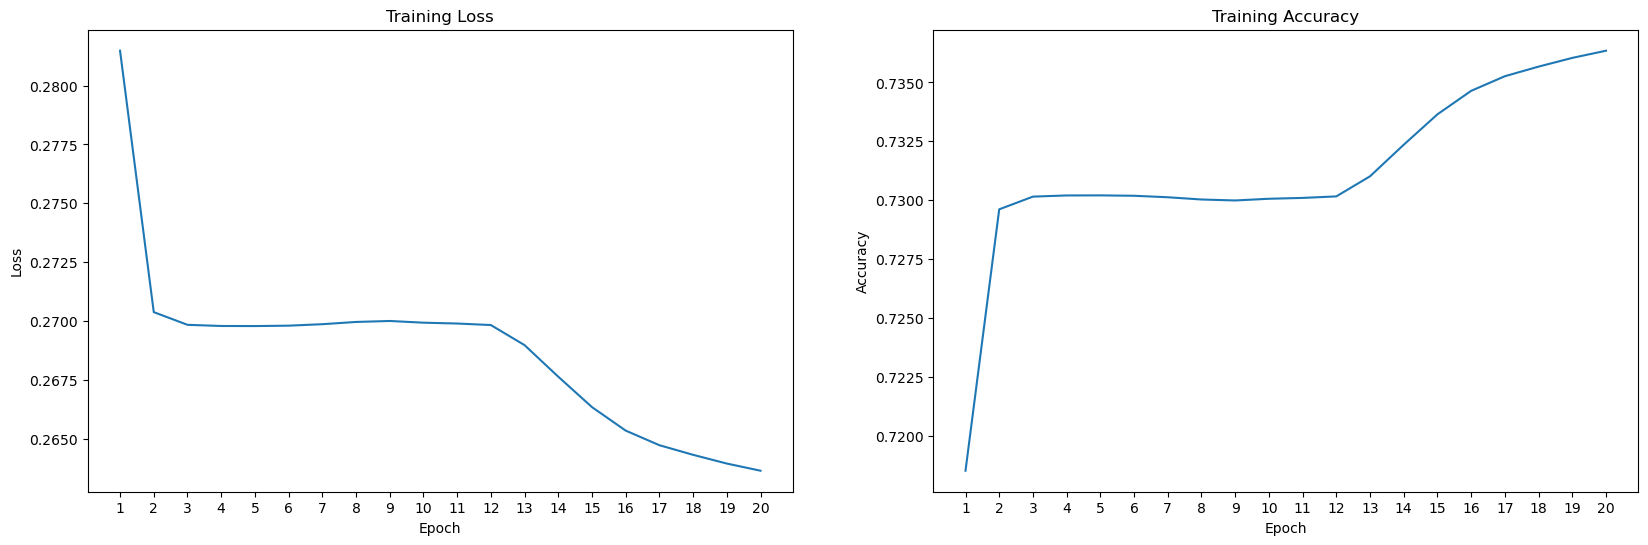

In [21]:
# Plot loss and accuracy
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(losses) + 1), losses)  # Menyesuaikan sumbu x
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1, len(losses) + 1))  # Menyesuaikan nilai pada sumbu x

plt.subplot(1, 2, 2)
plt.plot(range(1, len(accuracies) + 1), accuracies)  # Menyesuaikan sumbu x
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(accuracies) + 1))  # Menyesuaikan nilai pada sumbu x

plt.show()

In [22]:
# Save weights to a file
def save_weights(weights_hidden_output, bias_hidden_output, weights_input_hidden, bias_input_hidden, filename):
    with open(filename, 'wb') as f:
        np.savez(f, weights_hidden_output=weights_hidden_output, bias_hidden_output=bias_hidden_output,
                 weights_input_hidden=weights_input_hidden, bias_input_hidden=bias_input_hidden)

# Example usage
weights_hidden_output = model.weights_hidden_output
bias_hidden_output = model.bias_hidden_output
weights_input_hidden = model.weights_input_hidden
bias_input_hidden = model.bias_input_hidden
save_weights(weights_hidden_output, bias_hidden_output, weights_input_hidden, bias_input_hidden, '7. Bobot_skenario_7.npz')

In [23]:
print(model.output)

[[0.2463332  0.7536668 ]
 [0.2279622  0.7720378 ]
 [0.22896626 0.77103374]
 [0.27096026 0.72903974]
 [0.21528808 0.78471192]
 [0.21417644 0.78582356]
 [0.26401212 0.73598788]
 [0.42117122 0.57882878]
 [0.39835078 0.60164922]
 [0.3832331  0.6167669 ]
 [0.2822481  0.7177519 ]
 [0.27184627 0.72815373]
 [0.30176076 0.69823924]
 [0.47762129 0.52237871]
 [0.47081744 0.52918256]
 [0.35261149 0.64738851]
 [0.2879276  0.7120724 ]
 [0.40795003 0.59204997]
 [0.49895418 0.50104582]
 [0.32162282 0.67837718]
 [0.22486799 0.77513201]
 [0.2488753  0.7511247 ]
 [0.27122945 0.72877055]
 [0.22789583 0.77210417]
 [0.37270232 0.62729768]
 [0.57401033 0.42598967]
 [0.36280479 0.63719521]
 [0.11993616 0.88006384]
 [0.17743837 0.82256163]
 [0.63904735 0.36095265]
 [0.77183211 0.22816789]
 [0.46908458 0.53091542]
 [0.27459877 0.72540123]
 [0.21247926 0.78752074]
 [0.23107376 0.76892624]
 [0.19708999 0.80291001]
 [0.20264464 0.79735536]
 [0.24391157 0.75608843]
 [0.37653227 0.62346773]
 [0.46114724 0.53885276]


before argmax 
 [[0.93752362 0.06247638]
 [0.93752362 0.06247638]
 [0.93752362 0.06247638]
 ...
 [0.93752358 0.06247642]
 [0.93752358 0.06247642]
 [0.93752358 0.06247642]]
after argmax 
 [[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


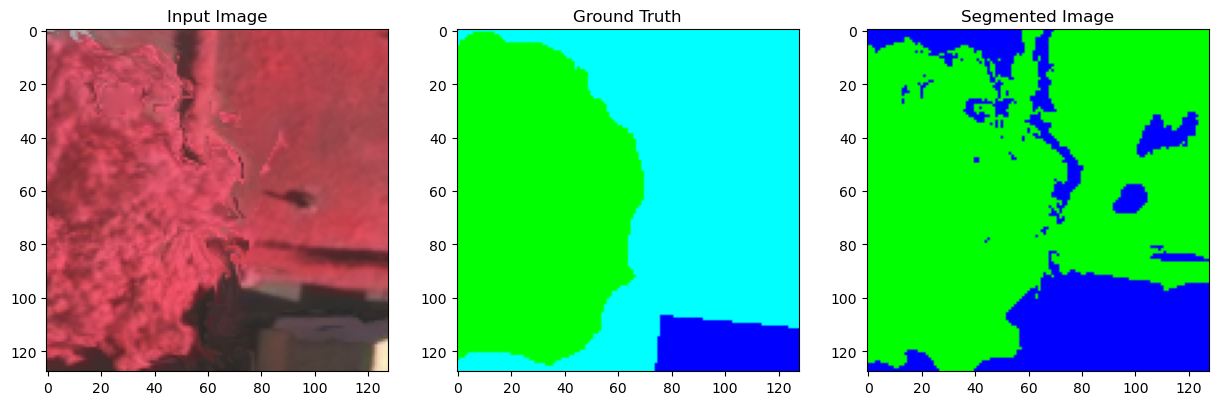

In [24]:
# Define colors for vegetation and non-vegetation
vegetation_color = [0, 255, 0]  # Green
non_vegetation_color = [0, 0, 255]  # Blue

# Visualize segmentation results for one image
indexing = 2
input_image = images_load[indexing]
ground_truth = ground_truths[indexing]
features_get = fe.extract(input_image)

# Preprocess the input image
input_image_reshaped = cv2.resize(input_image, (128, 128)) / 255.0
features = input_image_reshaped.reshape(-1, 3)  # Remove the transpose operation here

# Predict segmentation mask
predicted_mask = model.forward(features)
pred_before = predicted_mask
print('before argmax \n',pred_before)
predicted_mask = predicted_mask.argmax(axis=1).reshape(128, 128)
pred_after= predicted_mask
print('after argmax \n',pred_after)
# print(len(predicted_mask))
# Create segmented image
segmented_image = np.zeros((128, 128, 3), dtype=np.uint8)

# Assign colors based on predicted mask
segmented_image[predicted_mask == 0] = non_vegetation_color
segmented_image[predicted_mask == 1] = vegetation_color

# Plot the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title('Input Image')

plt.subplot(1, 3, 2)
plt.imshow(ground_truth)
plt.title('Ground Truth')

plt.subplot(1, 3, 3)
plt.imshow(segmented_image)
plt.title('Segmented Image')

plt.show()

In [24]:
print('nilai prediksi \n', pred_before[50:60])
print('hasil argmax \n', pred_after[2][50:60])

nilai prediksi 
 [[ 0.91309717  0.08292262]
 [ 0.9657361   0.03225555]
 [ 0.99289534  0.00696309]
 [ 1.01450834 -0.01145675]
 [ 1.01434747 -0.0074396 ]
 [ 1.00350878  0.00605556]
 [ 0.99560038  0.01536018]
 [ 0.99342313  0.01787501]
 [ 0.99394047  0.01728584]
 [ 0.99504067  0.01600845]]
hasil argmax 
 [0 0 0 0 0 0 0 0 0 0]


Indeks yang ada warna merah
> 2007
> 2011 - 2013

Keperluan BI indeks analisa : 6, 19, 2012, 3192

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title('Input Image')

plt.subplot(1, 3, 2)
plt.imshow(ground_truth)
plt.title('Ground Truth')

plt.subplot(1, 3, 3)
plt.imshow(segmented_image)
plt.title('Segmented Image')

=-=-=--=-=

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(input_image)
plt.title('Input Image')

plt.subplot(2, 2, 2)
plt.imshow(features_get)
plt.title('Feature Maps')

plt.subplot(2, 2, 3)
plt.imshow(ground_truth)
plt.title('Ground Truth')

plt.subplot(2, 2, 4)
plt.imshow(segmented_image)
plt.title('Segmented Image')